In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('evaluation_returns.csv')
data.head()

,Zero-Sum DDPG,Standard DDPG
0,-1877.116656,-1969.337474
1,-1960.375418,-1945.591985
2,-1901.724840,-1944.717604
3,-1919.627878,-1923.164642
4,-2011.384230,-1971.754575


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_2981/3495699971.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['Zero-Sum DDPG'], data['Standard DDPG']], labels=['Zero-Sum DDPG', 'Standard DDPG'])


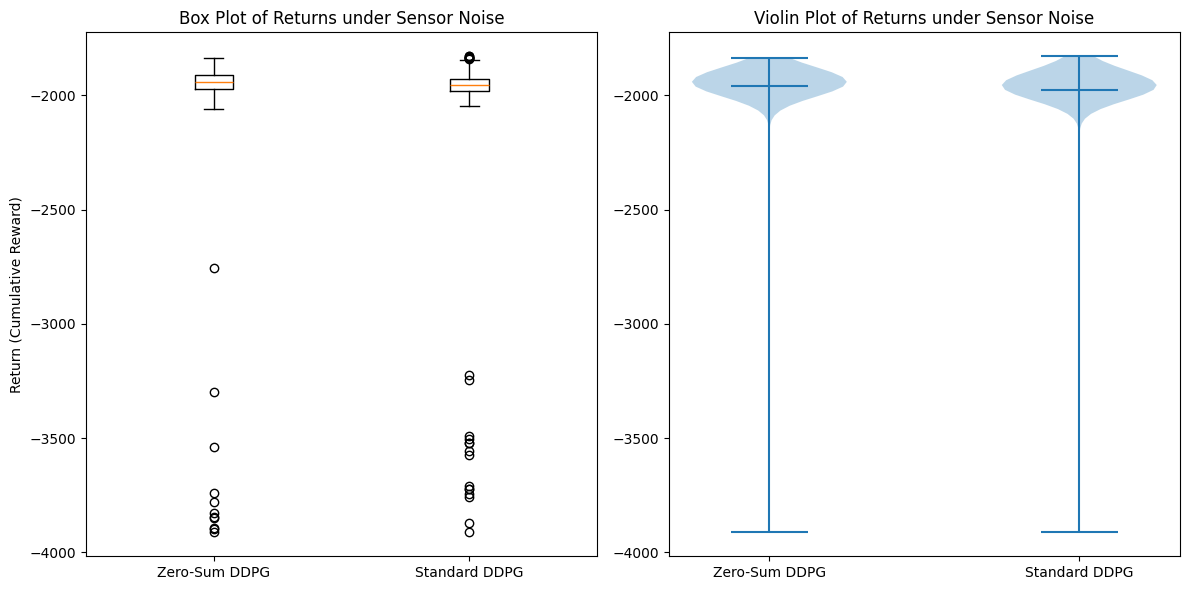

In [22]:
# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot([data['Zero-Sum DDPG'], data['Standard DDPG']], labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Sensor Noise')
plt.ylabel('Return (Cumulative Reward)')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot([data['Zero-Sum DDPG'], data['Standard DDPG']], showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Sensor Noise')

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler

# 1) Read the CSV into a DataFrame
df = pd.read_csv("evaluation_returns.csv")
df_100 = df.sample(n=10, random_state=42)
df = df_100

# 2) Clean column names to remove non-alphanumeric chars, replace with underscores
df.columns = [re.sub(r"\W+", "_", col) for col in df.columns]
data = df

# 3) Normalize the data (Min-Max scaling to [0,1])
# Subtract each column's mean and divide by its standard deviation
df_standardized = (data - data.mean()) / data.std()

print(df_standardized.head())

# 4) Write the normalized data to a .dat file, using tabs
df_standardized.to_csv("../../../../../Report/plots/ddpg/violin_plot/actuator_disturbance.dat", sep="\t", index=False)

print("Normalized data written to 'actuator_disturbance.dat' with cleaned headers.")


     Zero_Sum_DDPG  Standard_DDPG
521      -0.189660      -1.350863
737      -0.120482      -0.429896
740       0.729727       0.052161
660      -1.550210       0.248554
411       1.937829      -0.765331
Normalized data written to 'actuator_disturbance.dat' with cleaned headers.
